In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [10]:
# Extract dataset
zip_file_path = 'assets/rockpaperscissors.zip'
extract_folder = 'assets/extracted/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [11]:
# Define paths
base_dir = 'assets/extracted/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [12]:
# Split the dataset into train and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.


Found 874 images belonging to 3 classes.


In [13]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32,
    epochs=30,
    validation_data=validation_generator)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 29s 712ms/step - accuracy: 0.8648 - loss: 0.3818 - val_accuracy: 0.9352 - val_loss: 0.2119
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.8438 - loss: 0.4149 - val_accuracy: 0.9306 - val_loss: 0.2139
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 942ms/step - accuracy: 0.9240 - loss: 0.2182 - val_accuracy: 0.9294 - val_loss: 0.2202
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 253ms/step - accuracy: 0.9688 - loss: 0.1514 - val_accuracy: 0.9641 - val_loss: 0.1511
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 991ms/step - accuracy: 0.9436 - loss: 0.1867 - val_accuracy: 0.9630 - val_loss: 0.1432
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9375 - loss: 0.1623 - val_accuracy: 0.9028 - val_loss: 0.2596
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9394 - loss: 0.2117 - val_accuracy: 0.9375 - val_loss: 0.1534
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 1.0000 - loss: 0.0762 - val_accuracy:

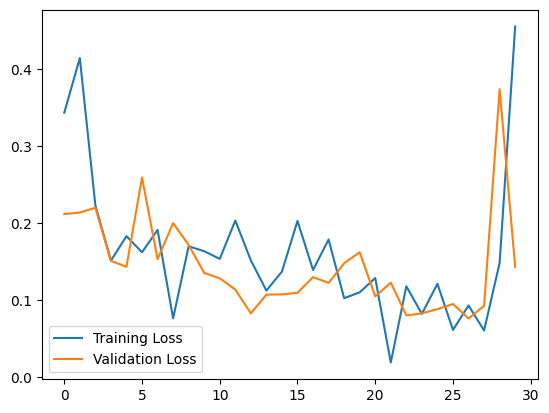

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [22]:
# Access the values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print the values
print("Training Accuracy: ", acc[-1])
print("Validation Accuracy: ", val_acc[-1])

Training Accuracy:  0.84375
Validation Accuracy:  0.9629629850387573


In [23]:
# Save model
joblib.dump(model, 'model.keras')

['model.keras']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


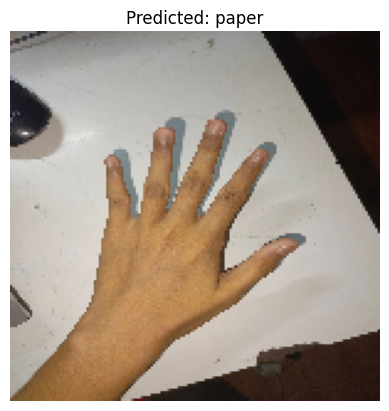

In [25]:
def predict_image(image_path, model, class_names):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.  # Normalization

    # Prediction
    prediction = model.predict(img_tensor)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_class_index]
    
    # Show result
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
    
    return predicted_class

# List class from train_generator
class_names = list(train_generator.class_indices.keys()) 

# Input image
try:
    from google.colab import files
    uploaded = files.upload()
    image_paths = list(uploaded.keys()) 
except ImportError:
    image_paths = [input("Masukkan path gambar: ")]

# Uploaded image prediction
for image_path in image_paths:
    predicted_class = predict_image(image_path, model, class_names)
